# **9차시: 이상치 처리**
## 🔍 **학습목표**
데이터 내 이상치를 탐색하고, 적절한 기준에 따라 처리할 수 있다.

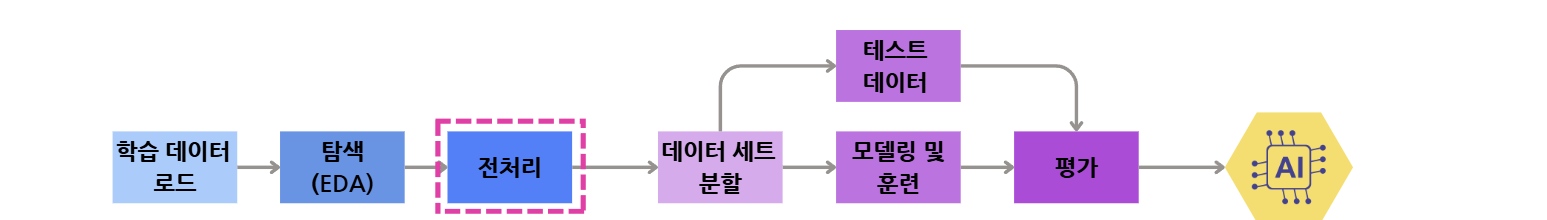

**짜장면 가격 예측**

**[데이터 설명: jajang_price.csv]**
- `year`: 기준 연도
- `location`: 식당 위치 (예: Seoul, Busan)
- `restaurant_type`: 식당 유형 (예: Normal, Franchise, Premium)
- `delivery_only`: 배달 전문 여부 (1: Yes, 0: No)
- `special_menu`: 특별 메뉴 여부 (예: Basic, Ganjjajang)
- `cpi`: 소비자물가지수
- `flour_index`: 밀가루물가지수
- `pork_index`: 돼지고기물가지수
- `onion_index`: 양파물가지수
- `minimum_wage`: 해당 연도 최저임금 (시급)
- `coupon_discount`: 쿠폰 할인율 (%)
- **`price`: 짜장면 가격 (단위: 원) <== 목적 변수**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('데이터세트/jajang_price.csv')
df.head()

,year,cpi,flour_index,pork_index,onion_index,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price
0,2000,36.444365,39.562248,33.170651,30.421736,1865,Gyeonggi,Ganjjajang,Normal,0,8.6,2800
1,1973,11.043598,12.683397,10.626395,NaN,231,Gyeonggi,Ganjjajang,Normal,0,2.9,1700
2,1980,15.622815,14.034484,17.451849,21.881817,326,Seoul,Basic,Normal,0,7.4,1300
3,2011,61.829747,56.947619,74.465223,66.331692,4320,Daegu,Ganjjajang,Franchise,1,7.7,4850
4,1981,16.772157,15.112856,15.336770,22.060043,350,Incheon,Ganjjajang,Franchise,0,2.2,2350


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8000 non-null   int64  
 1   cpi              8000 non-null   float64
 2   flour_index      8000 non-null   float64
 3   pork_index       7840 non-null   float64
 4   onion_index      7040 non-null   float64
 5   minimum_wage     8000 non-null   int64  
 6   location         8000 non-null   object 
 7   special_menu     8000 non-null   object 
 8   restaurant_type  8000 non-null   object 
 9   delivery_only    8000 non-null   int64  
 10  coupon_discount  8000 non-null   float64
 11  price            8000 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 750.1+ KB


---


## 📌 **핵심 이론 정리**

- **이상치(Outlier)**: 다른 데이터와 **현저히 다른 값**을 가지는 데이터
- 데이터 분석 및 모델링 시 **왜곡**을 일으킬 수 있음
- 이상치는 제거할 수도 있고, 별도로 분석에 활용할 수도 있음


## **1.이상치 탐색 방법**
- **IQR 기준**
  - Q1 = 25%, Q3 = 75%
  - IQR = Q3 - Q1
  - 이상치 기준:  
    - 아래쪽: Q1 - 1.5 * IQR  
    - 위쪽: Q3 + 1.5 * IQR
- **시각화 기반**
  - `boxplot()` 으로 확인 (박스 밖의 점)


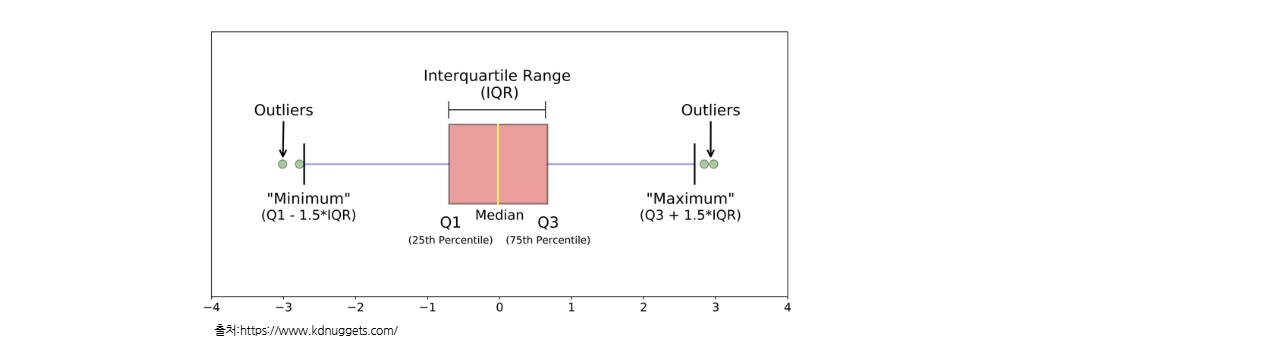

In [8]:
# price 사분위수 확인
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f'하한: {lower:.2f}, 상한: {upper:.2f}')

하한: -3500.00, 상한: 9700.00


<Axes: ylabel='price'>

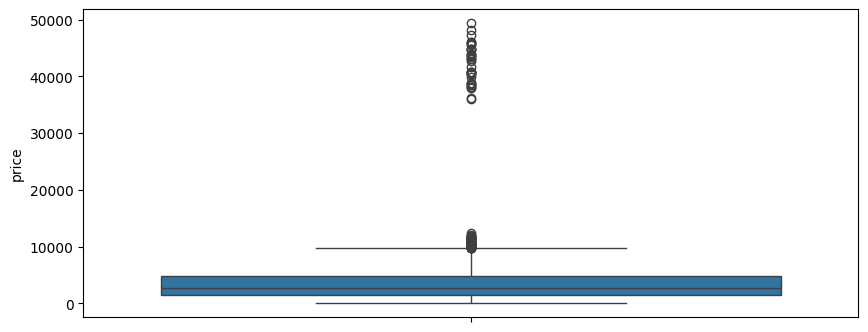

In [ ]:
# 전체 컬럼 박스플롯 시각화
plt.figure(figsize=(10,4))
sns.boxplot(y='price',data=df)

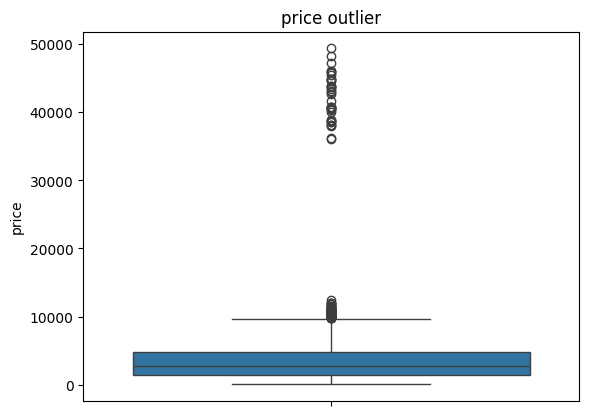

In [6]:
# 박스플롯 시각화
sns.boxplot(y='price', data=df)
plt.title('price outlier')
plt.show()

0       False
1       False
2       False
3       False
4       False
        ...  
7995    False
7996    False
7997    False
7998    False
7999    False
Name: price, Length: 8000, dtype: bool

In [13]:
# 이상치 포함 여부 확인
outliers = df[(df['price'] < lower) | (df['price'] > upper)]
print(f'이상치 개수: {len(outliers)}')

outliers.head(10)

이상치 개수: 116


,year,cpi,flour_index,pork_index,onion_index,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price
40,2020,86.057871,103.160675,96.165135,105.436155,8590,Gyeonggi,Ganjjajang,Premium,1,12.8,10300
81,2018,86.844991,77.975176,108.089445,128.327797,7530,Seoul,Ganjjajang,Premium,1,10.5,9950
94,2017,76.030804,60.933846,68.504646,106.336792,6470,Seoul,Samseon,Premium,0,7.1,10850
193,2007,52.211942,54.462146,56.561628,56.243781,3770,Gyeonggi,Ganjjajang,Premium,0,3.8,47248
298,2019,88.768641,90.778736,93.262454,92.281313,8350,Seoul,Ganjjajang,Premium,1,8.0,10650
319,2020,89.732352,105.021334,88.234580,87.008186,8590,Seoul,Ganjjajang,Premium,0,1.6,11100
463,2023,104.287433,83.794134,104.426618,108.072863,9620,Gyeonggi,Samseon,Franchise,1,9.0,10900
486,1976,13.481393,11.819681,14.294357,NaN,282,Seoul,Ganjjajang,Premium,0,1.0,40522
564,2014,66.336045,65.020898,81.811625,NaN,5210,Seoul,Samseon,Premium,1,0.1,43814
601,2021,96.204838,92.177174,102.587498,92.572799,8720,Seoul,Ganjjajang,Premium,1,5.9,11550


## **2.이상치 제거**
- `df[조건]` 으로 정상범위만 남기기



In [12]:
print(f'제거 전 행 개수: {len(df)}')

clean_df = df[(df['price'] >= lower) & (df['price'] <= upper)]

print(f'제거 후 행 개수: {len(clean_df)}')

제거 전 행 개수: 8000
제거 후 행 개수: 7884


<Axes: ylabel='price'>

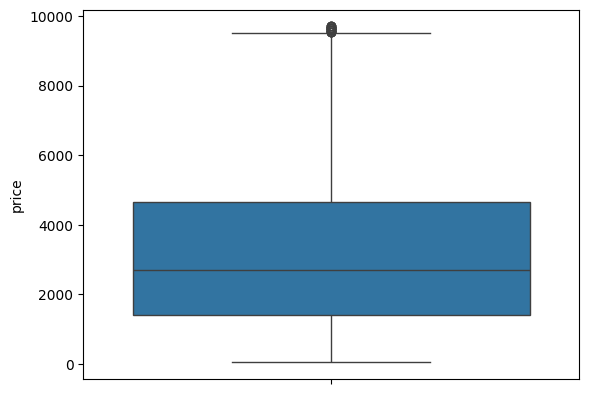

In [13]:
sns.boxplot(y=clean_df['price'])

> ❓
**왜 이상치가 또 생기나요?**
> - 이상치 제거 후 boxplot을 다시
그리면 Q1, Q3, IQR이 새로 계산됩니다.
> - 그 결과 기준이 달라지면서 새로운 이상치가 다시 탐지될 수 있습니다.

---

## **연습 문제**

### **문제 1. 돼지고기 물가지수 `pork_index` 컬럼의 이상치를 IQR 방식으로 탐색하세요.**

- 대상 데이터프레임: `df`
- IQR의 상한과 하한치를 출력하시오.

In [14]:
# 여기에 코드를 작성하세요.
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('데이터세트/jajang_price.csv')
df.head(10)

,year,cpi,flour_index,pork_index,onion_index,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price
0,2000,36.444365,39.562248,33.170651,30.421736,1865,Gyeonggi,Ganjjajang,Normal,0,8.6,2800
1,1973,11.043598,12.683397,10.626395,NaN,231,Gyeonggi,Ganjjajang,Normal,0,2.9,1700
2,1980,15.622815,14.034484,17.451849,21.881817,326,Seoul,Basic,Normal,0,7.4,1300
3,2011,61.829747,56.947619,74.465223,66.331692,4320,Daegu,Ganjjajang,Franchise,1,7.7,4850
4,1981,16.772157,15.112856,15.336770,22.060043,350,Incheon,Ganjjajang,Franchise,0,2.2,2350
5,1974,11.534859,12.391634,13.812166,17.254980,241,Gwangju,Ganjjajang,Normal,0,14.0,1000
6,2010,60.547698,63.766273,NaN,NaN,4110,Busan,Basic,Normal,1,1.1,2750
7,1971,10.127112,11.239954,10.328119,11.884916,211,Seoul,Basic,Normal,0,12.4,1150
8,2004,42.768995,48.620358,44.153288,43.238298,2840,Gwangju,Ganjjajang,Franchise,0,8.2,3700
9,1983,17.842788,16.606010,21.540725,24.687440,373,Seoul,Basic,Normal,0,14.3,1400


In [22]:
Q1=df['pork_index'].quantile(0.25)
Q3=df['pork_index'].quantile(0.75)
IQR=Q3-Q1

upper=Q3 + 1.5*IQR
lower=Q1 - 1.5*IQR
print(f'상한 : {upper:.2f} 하한 : {lower:.2f}')

상한 : 130.22 하한 : -47.19


### **문제 2. 이상치로 판단된 행을 outlier_df 변수에 저장하고, 총 몇 건인지 출력하세요.**

- 대상 데이터프레임: `df`

In [42]:
# 여기에 코드를 작성하세요
cond1 = df['pork_index']<lower
cond2 = df['pork_index']>upper
cond = cond1|cond2

outlier_df = df[cond]
outlier_df[['year','pork_index']]

,year,pork_index
1139,2023,136.600933
1362,2023,131.150305
2890,2023,133.250899
4078,2023,137.650675
4761,2023,136.207169
4917,2023,132.193592
5211,2023,130.841634
5955,2023,133.257430
6040,2023,137.704564
6323,2022,133.573504


## **도전 문제**

### **문제 1. 이상치를 특정 값(30,000원)으로 대체하기**

데이터 양이 적은 관계로 삭제하기 보다는  IQR 기준으로 탐지된 모든 가격 이상치(`outlier`)들을 **특정 값인 30,000원으로 일괄 대체**하려고 합니다.

이상치를 30,000원으로 대체한 후, `price` 컬럼의 **평균(mean)**이 어떻게 변하는지 확인하고, 처리 전후의 값을 각각 출력하세요.


1.  IQR 이용해 이상치에 해당하는 조건을 만듭니다.
2.  `.loc`을 사용하여 해당 행들의 `price` 값을 30,000으로 변경합니다.
3.  처리 전과 후의 `price` 컬럼의 평균을 계산하고 출력합니다.

In [64]:
#데이터 로드
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('데이터세트/jajang_price.csv')

#데이터 분석
df.info()

#이상치 찾기 (하한:-4500.00, 상한:9700.00)
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print(f'하한:{lower:.2f} 상한:{upper:.2f}')

#이상치에 해당하는 데이터프레임 정의
cond1=df['price']<lower
cond2=df['price']>upper
cond=cond1|cond2
outlier_price=df[cond]

#이상치의 price값을 30,000으로 변경
df_cp=df.copy()
df_cp.loc[cond,['price']]=30000

#처리 전과 처리 후의 price 평균
before=df['price'].mean()
later=df_cp['price'].mean()
print(before,later)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8000 non-null   int64  
 1   cpi              8000 non-null   float64
 2   flour_index      8000 non-null   float64
 3   pork_index       7840 non-null   float64
 4   onion_index      7040 non-null   float64
 5   minimum_wage     8000 non-null   int64  
 6   location         8000 non-null   object 
 7   special_menu     8000 non-null   object 
 8   restaurant_type  8000 non-null   object 
 9   delivery_only    8000 non-null   int64  
 10  coupon_discount  8000 non-null   float64
 11  price            8000 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 750.1+ KB
하한:-3500.00 상한:9700.00
3485.0595 3612.4125


In [62]:
before

np.float64(3485.0595)

In [63]:
later

np.float64(3612.4125)

In [ ]:
# 여기에 코드를 작성하세요